In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gammas = [2,4,8,16]
lr = 1.0e-5


for g in gammas:
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search gpt2, learning rate 1e-05 focal loss, gamma: 2


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	24.7123	Val Loss:	2.5333	Accuracy:	0.0858	F1:	0.0792
2 / 30: Train Loss:	18.3023	Val Loss:	2.3583	Accuracy:	0.0769	F1:	0.0734
3 / 30: Train Loss:	17.2359	Val Loss:	2.2905	Accuracy:	0.0858	F1:	0.0797
4 / 30: Train Loss:	16.4506	Val Loss:	2.2540	Accuracy:	0.1095	F1:	0.1062
5 / 30: Train Loss:	16.4844	Val Loss:	2.2249	Accuracy:	0.1509	F1:	0.1464
6 / 30: Train Loss:	15.6734	Val Loss:	2.2177	Accuracy:	0.1272	F1:	0.1293
7 / 30: Train Loss:	15.9732	Val Loss:	2.1956	Accuracy:	0.1450	F1:	0.1397
8 / 30: Train Loss:	15.3856	Val Loss:	2.1874	Accuracy:	0.1420	F1:	0.1331
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.38      0.09      0.14        67
               anecdote       0.80      0.09      0.17        43
         cherry picking       1.00      0.02      0.04        56
      conspiracy theory       0.50      0.15      0.24        39
  

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	22.2537	Val Loss:	2.5229	Accuracy:	0.0828	F1:	0.0772
2 / 30: Train Loss:	15.3065	Val Loss:	2.3492	Accuracy:	0.0799	F1:	0.0747
3 / 30: Train Loss:	14.1305	Val Loss:	2.2784	Accuracy:	0.0858	F1:	0.0787
4 / 30: Train Loss:	13.2876	Val Loss:	2.2429	Accuracy:	0.1095	F1:	0.1051
5 / 30: Train Loss:	13.3121	Val Loss:	2.2173	Accuracy:	0.1450	F1:	0.1397
6 / 30: Train Loss:	12.4785	Val Loss:	2.2127	Accuracy:	0.1243	F1:	0.1253
7 / 30: Train Loss:	12.7675	Val Loss:	2.1920	Accuracy:	0.1479	F1:	0.1400
8 / 30: Train Loss:	12.1830	Val Loss:	2.1836	Accuracy:	0.1479	F1:	0.1404
9 / 30: Train Loss:	11.8760	Val Loss:	2.1691	Accuracy:	0.1479	F1:	0.1288
10 / 30: Train Loss:	11.7792	Val Loss:	2.1452	Accuracy:	0.1479	F1:	0.1287
11 / 30: Train Loss:	11.5536	Val Loss:	2.1129	Accuracy:	0.1864	F1:	0.1616
12 / 30: Train Loss:	11.0432	Val Loss:	2.1110	Accuracy:	0.1805	F1:	0.1678
13 / 30: Train Loss:	10.8463	Val Loss:	2.0655	Accuracy:	0.1893	F1:	0.1786
14 / 30: Train Loss:	10.3931	Val Loss:	2.0324	A

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	18.8564	Val Loss:	2.5090	Accuracy:	0.0828	F1:	0.0773
2 / 30: Train Loss:	11.0608	Val Loss:	2.3362	Accuracy:	0.0799	F1:	0.0718
3 / 30: Train Loss:	9.7522	Val Loss:	2.2633	Accuracy:	0.0917	F1:	0.0845
4 / 30: Train Loss:	8.8824	Val Loss:	2.2356	Accuracy:	0.1006	F1:	0.0881
5 / 30: Train Loss:	8.9028	Val Loss:	2.2131	Accuracy:	0.1272	F1:	0.1145
6 / 30: Train Loss:	8.0951	Val Loss:	2.2114	Accuracy:	0.1302	F1:	0.1254
7 / 30: Train Loss:	8.3513	Val Loss:	2.1954	Accuracy:	0.1479	F1:	0.1353
8 / 30: Train Loss:	7.8376	Val Loss:	2.1860	Accuracy:	0.1391	F1:	0.1264
9 / 30: Train Loss:	7.6077	Val Loss:	2.1733	Accuracy:	0.1361	F1:	0.1100
10 / 30: Train Loss:	7.5932	Val Loss:	2.1543	Accuracy:	0.1598	F1:	0.1355
11 / 30: Train Loss:	7.4216	Val Loss:	2.1358	Accuracy:	0.1864	F1:	0.1645
12 / 30: Train Loss:	7.1064	Val Loss:	2.1348	Accuracy:	0.1657	F1:	0.1481
13 / 30: Train Loss:	7.0557	Val Loss:	2.1081	Accuracy:	0.1834	F1:	0.1718
14 / 30: Train Loss:	6.7975	Val Loss:	2.0909	Accuracy:	0.1

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	15.0890	Val Loss:	2.5037	Accuracy:	0.0888	F1:	0.0834
2 / 30: Train Loss:	6.5075	Val Loss:	2.3284	Accuracy:	0.0799	F1:	0.0708
3 / 30: Train Loss:	5.1660	Val Loss:	2.2590	Accuracy:	0.1065	F1:	0.0913
4 / 30: Train Loss:	4.3637	Val Loss:	2.2400	Accuracy:	0.1036	F1:	0.0852
5 / 30: Train Loss:	4.3945	Val Loss:	2.2199	Accuracy:	0.1243	F1:	0.1098
6 / 30: Train Loss:	3.6773	Val Loss:	2.2168	Accuracy:	0.1361	F1:	0.1170
7 / 30: Train Loss:	3.8635	Val Loss:	2.2082	Accuracy:	0.1420	F1:	0.1244
8 / 30: Train Loss:	3.4850	Val Loss:	2.1983	Accuracy:	0.1331	F1:	0.1154
9 / 30: Train Loss:	3.3206	Val Loss:	2.1906	Accuracy:	0.1450	F1:	0.1154
10 / 30: Train Loss:	3.3779	Val Loss:	2.1808	Accuracy:	0.1420	F1:	0.1181
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.38      0.13      0.20        67
               anecdote       0.50      0.02      0.04     

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

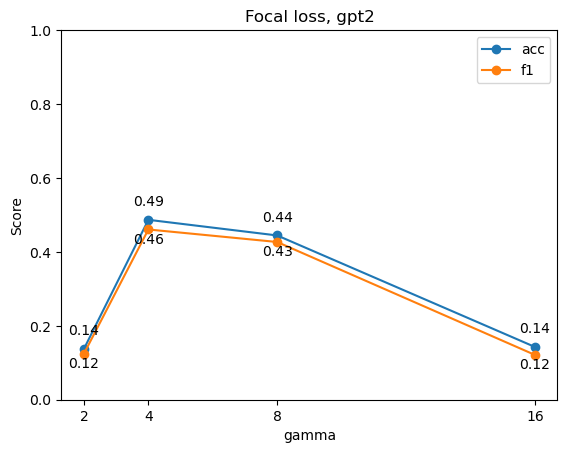

In [6]:
def plot_grid_search(df, title, column):

    # Create the plot
    ax = df.plot(x=column, y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row[column], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row[column], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df[column], [val for val in df[column]], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, {model_checkpoint}', 'g')